In [83]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [2]:
data = pd.read_csv('availability.csv')
data

,ID,nom,coordinates,communes,capacity,availability_bike,unavailable_duration,unavailable_count,latitude,longitude,postcode
0,10001,René Boulanger - Lancry,"48.8685433, 2.3600032",Paris 10e Arrondissement,62,11.869707,0.0,0,48.868543,2.360003,75010
1,10003,Hauteville - Bonne Nouvelle,"48.87077436024, 2.3496496368327",Paris 10e Arrondissement,17,7.632075,119.0,2,48.870774,2.349650,75010
2,10004,Metz - Faubourg Saint-Denis,"48.870893, 2.353521",Paris 10e Arrondissement,48,17.184211,0.0,0,48.870893,2.353521,75010
3,10005,Petites Ecuries - Faubourg Poissonnière,"48.87397217237368, 2.348388757504776",Paris 10e Arrondissement,17,7.911932,0.0,0,48.873972,2.348389,75010
4,10006,Petites Ecuries - Faubourg Saint-Denis,"48.87287120589831, 2.3542150855064397",Paris 10e Arrondissement,28,13.638776,0.0,0,48.872871,2.354215,75010
...,...,...,...,...,...,...,...,...,...,...,...
1427,92004,Nanterre - Université,"48.901365, 2.212693",Nanterre,20,16.389831,0.0,0,48.901365,2.212693,92000
1428,92005,Gare de Nanterre Ville,"48.8950295, 2.1957932",Nanterre,43,21.022901,0.0,0,48.895029,2.195793,92000
1429,92006,Place Nelson Mandela,"48.897874318180556, 2.2182820737361912",Nanterre,30,5.030612,121.0,1,48.897874,2.218282,92000
1430,92007,Pesaro - Préfecture,"48.89577046284005, 2.223908342421055",Nanterre,22,6.164179,123.0,2,48.895770,2.223908,92000


# EDA

In [3]:
data.shape

(1432, 11)

In [4]:
data.nunique()

ID                      1432
nom                     1430
coordinates             1432
communes                  81
capacity                  61
availability_bike       1423
unavailable_duration     200
unavailable_count         12
latitude                1432
longitude               1430
postcode                  85
dtype: int64

In [5]:
data.isna().any()

ID                      False
nom                     False
coordinates             False
communes                False
capacity                False
availability_bike       False
unavailable_duration    False
unavailable_count       False
latitude                False
longitude               False
postcode                False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1432 non-null   int64  
 1   nom                   1432 non-null   object 
 2   coordinates           1432 non-null   object 
 3   communes              1432 non-null   object 
 4   capacity              1432 non-null   int64  
 5   availability_bike     1432 non-null   float64
 6   unavailable_duration  1432 non-null   float64
 7   unavailable_count     1432 non-null   int64  
 8   latitude              1432 non-null   float64
 9   longitude             1432 non-null   float64
 10  postcode              1432 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 123.2+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1432.0,18599.208799,12160.851346,1001.000000,11025.750000,16109.000000,21953.250000,92008.000000
capacity,1432.0,31.525140,11.575206,11.000000,23.000000,30.000000,37.000000,74.000000
availability_bike,1432.0,12.474619,8.966498,0.000000,6.174597,10.350714,16.228485,74.805907
unavailable_duration,1432.0,96.476257,204.825503,0.000000,0.000000,0.000000,117.000000,2047.000000
unavailable_count,1432.0,1.006983,1.784303,0.000000,0.000000,0.000000,1.000000,11.000000
latitude,1432.0,48.858174,0.030696,48.764615,48.837592,48.858277,48.879337,48.951432
longitude,1432.0,2.340935,0.056778,2.165597,2.302564,2.343218,2.378635,2.538242
postcode,1432.0,80712.949721,8407.079125,75001.000000,75011.000000,75017.000000,92150.000000,95100.000000


# Cleaning Numerical Data

In [8]:
numerical = data.select_dtypes(include=np.number)
numerical = numerical.drop('ID',axis=1)

In [9]:
#for col in numerical.columns:
#    sns.displot(numerical[col], kde=True)
#    plt.show()

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


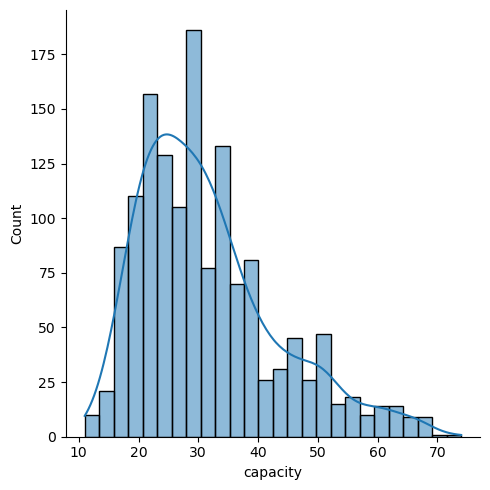

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


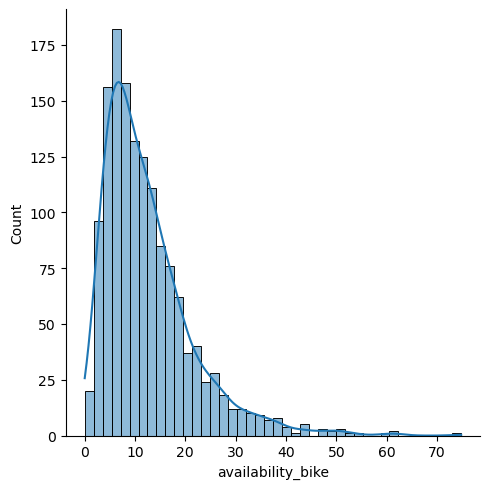

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


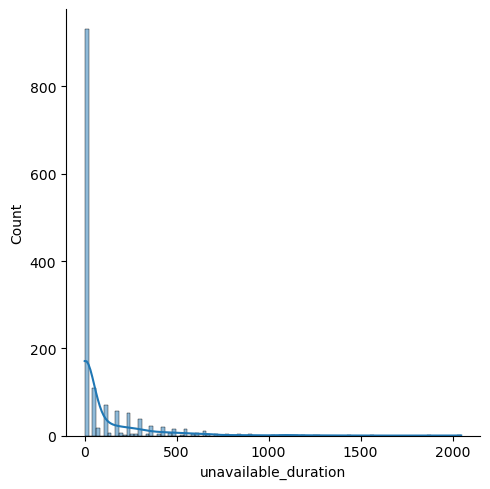

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


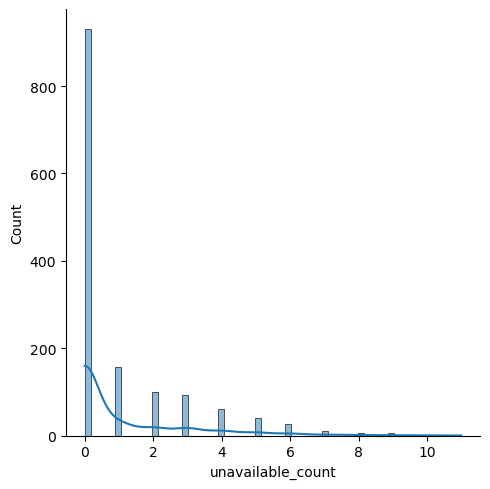

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


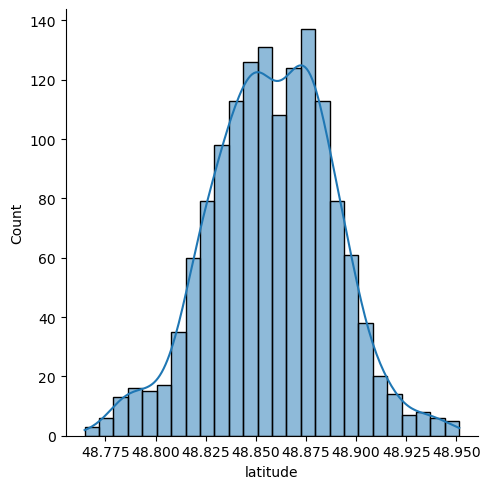

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


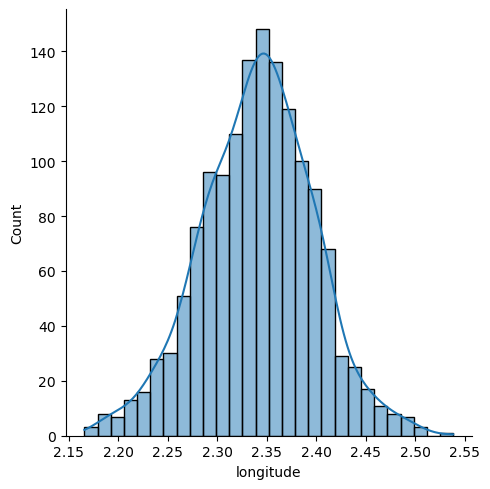

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


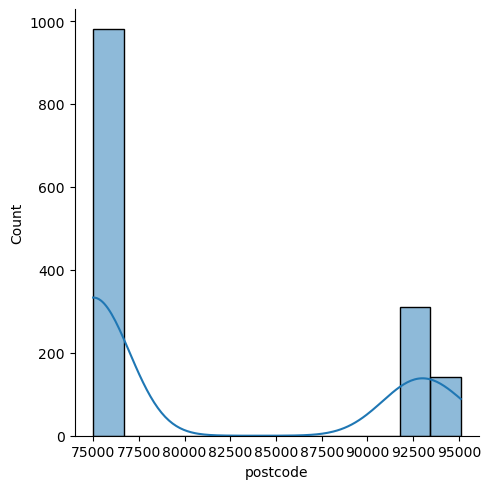

In [10]:
def plot_num(Dataframe):
    for column in Dataframe.columns:
        sns.displot(x=Dataframe[column],kde=True)
        plt.show()
    return None
   

plot_num(numerical)

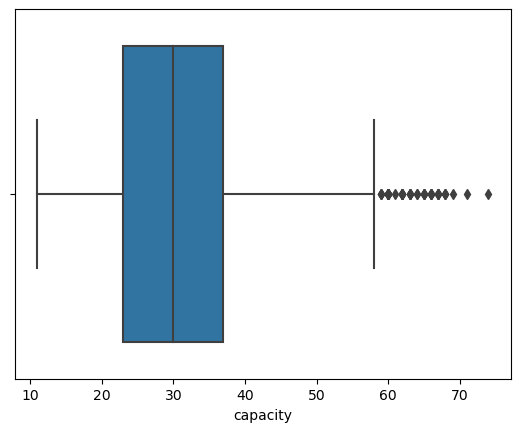

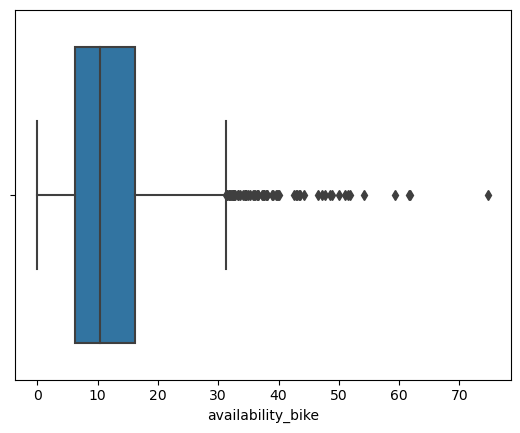

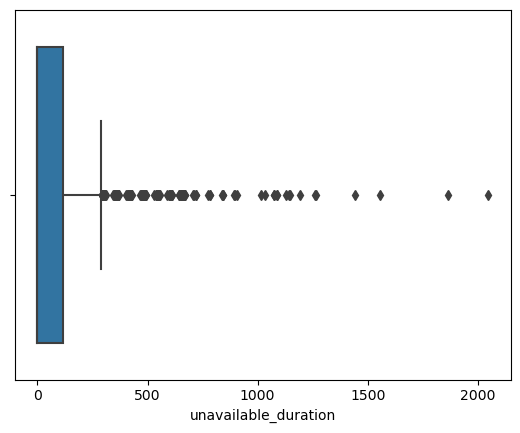

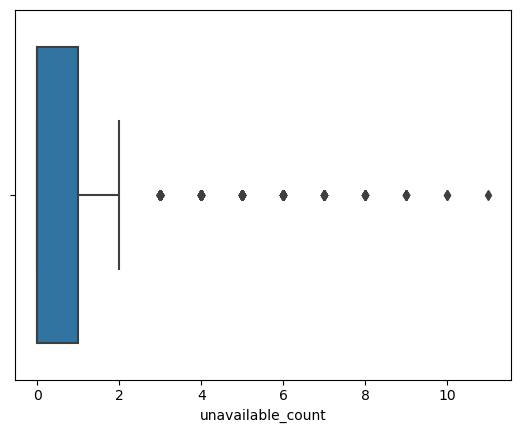

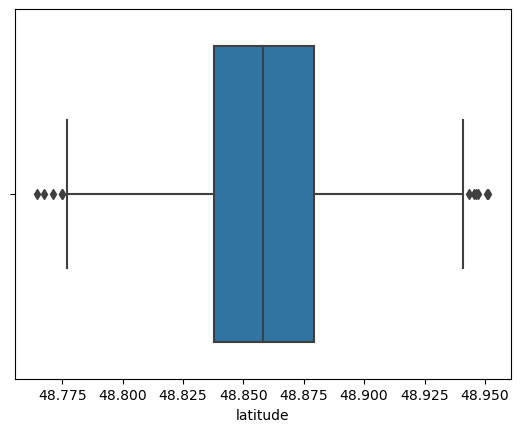

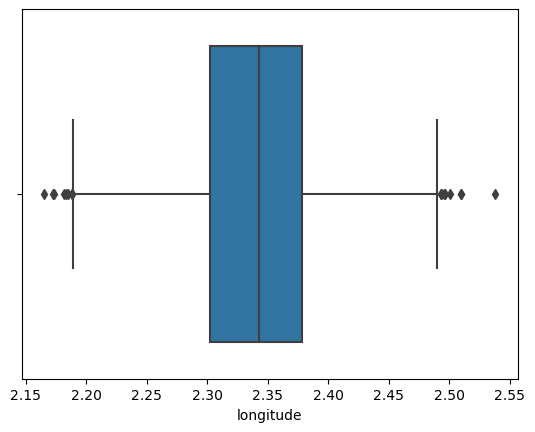

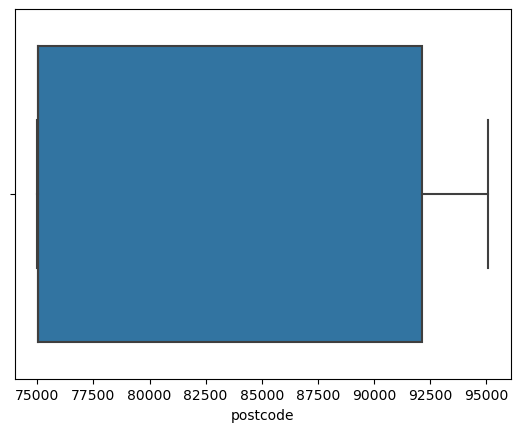

In [11]:
for column in numerical.columns:
        sns.boxplot(x=numerical[column])
        plt.show()

 #not too many outliers  

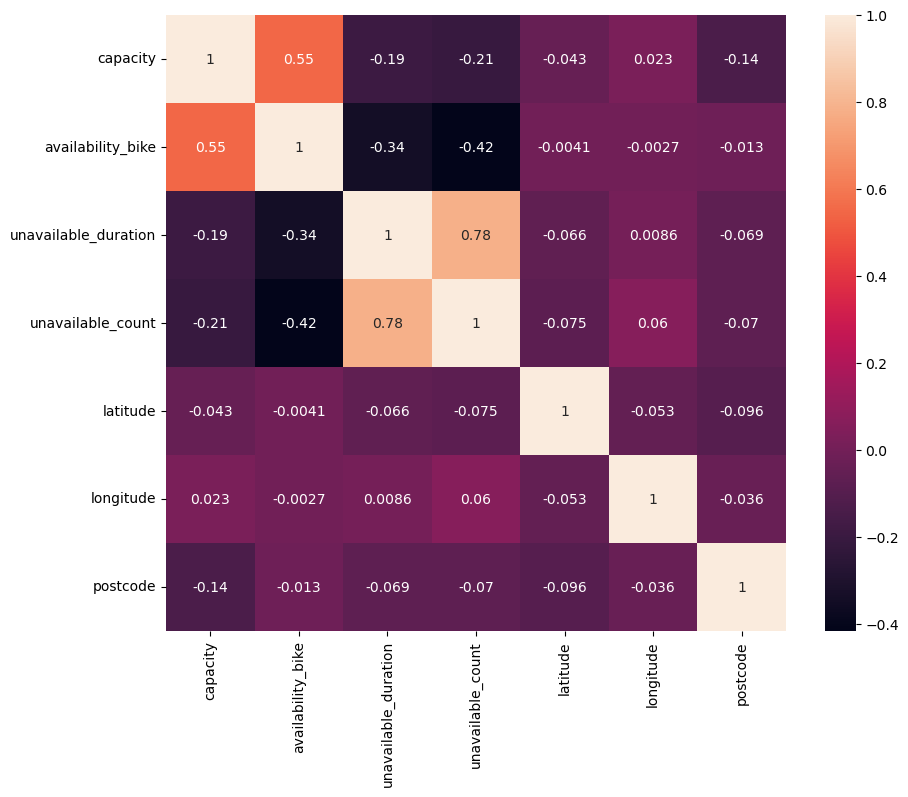

,capacity,availability_bike,unavailable_duration,unavailable_count,latitude,longitude,postcode
capacity,1.000000,0.551503,-0.194495,-0.207923,-0.042864,0.023244,-0.137485
availability_bike,0.551503,1.000000,-0.340867,-0.415879,-0.004145,-0.002733,-0.013016
unavailable_duration,-0.194495,-0.340867,1.000000,0.780939,-0.066080,0.008621,-0.068829
unavailable_count,-0.207923,-0.415879,0.780939,1.000000,-0.075427,0.059989,-0.070074
latitude,-0.042864,-0.004145,-0.066080,-0.075427,1.000000,-0.053276,-0.096105
longitude,0.023244,-0.002733,0.008621,0.059989,-0.053276,1.000000,-0.035762
postcode,-0.137485,-0.013016,-0.068829,-0.070074,-0.096105,-0.035762,1.000000


In [12]:
corr_matrix=numerical.corr() 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

corr_matrix

In [13]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity,1432.0,31.525140,11.575206,11.000000,23.000000,30.000000,37.000000,74.000000
availability_bike,1432.0,12.474619,8.966498,0.000000,6.174597,10.350714,16.228485,74.805907
unavailable_duration,1432.0,96.476257,204.825503,0.000000,0.000000,0.000000,117.000000,2047.000000
unavailable_count,1432.0,1.006983,1.784303,0.000000,0.000000,0.000000,1.000000,11.000000
latitude,1432.0,48.858174,0.030696,48.764615,48.837592,48.858277,48.879337,48.951432
longitude,1432.0,2.340935,0.056778,2.165597,2.302564,2.343218,2.378635,2.538242
postcode,1432.0,80712.949721,8407.079125,75001.000000,75011.000000,75017.000000,92150.000000,95100.000000


In [14]:
def value_count(df):
    for columns in df:
            print (len(numerical[columns].value_counts()),':  ',columns)
    return

value_count(numerical)
        

61 :   capacity
1423 :   availability_bike
200 :   unavailable_duration
12 :   unavailable_count
1432 :   latitude
1430 :   longitude
85 :   postcode


In [15]:
def outliers(column, threshold = 3):
   
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    
    return data

In [16]:
duration_outliers = outliers(numerical["unavailable_duration"])
len(duration_outliers)

27

In [17]:
count_outliers = outliers(numerical["unavailable_count"])
len(count_outliers)

26

In [18]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)
   
        

In [19]:
discrete_lst, continuous_lst = discrete_continuous(numerical)

In [20]:
print('Discrete List:  ',discrete_lst)
print('Continuous List:   ',continuous_lst)

Discrete List:   ['unavailable_count']
Continuous List:    ['capacity', 'availability_bike', 'unavailable_duration', 'latitude', 'longitude', 'postcode']


In [21]:
num_discrete_df = numerical[['unavailable_count','capacity']]
num_continuous_df = numerical[['availability_bike', 'unavailable_duration']]

# Cleaning Categorical Data

In [22]:
categorical=data.select_dtypes(include=object)

In [23]:
categorical.nunique()

nom            1430
coordinates    1432
communes         81
dtype: int64

In [24]:
categorical = categorical.drop(['nom','coordinates'],axis=1)

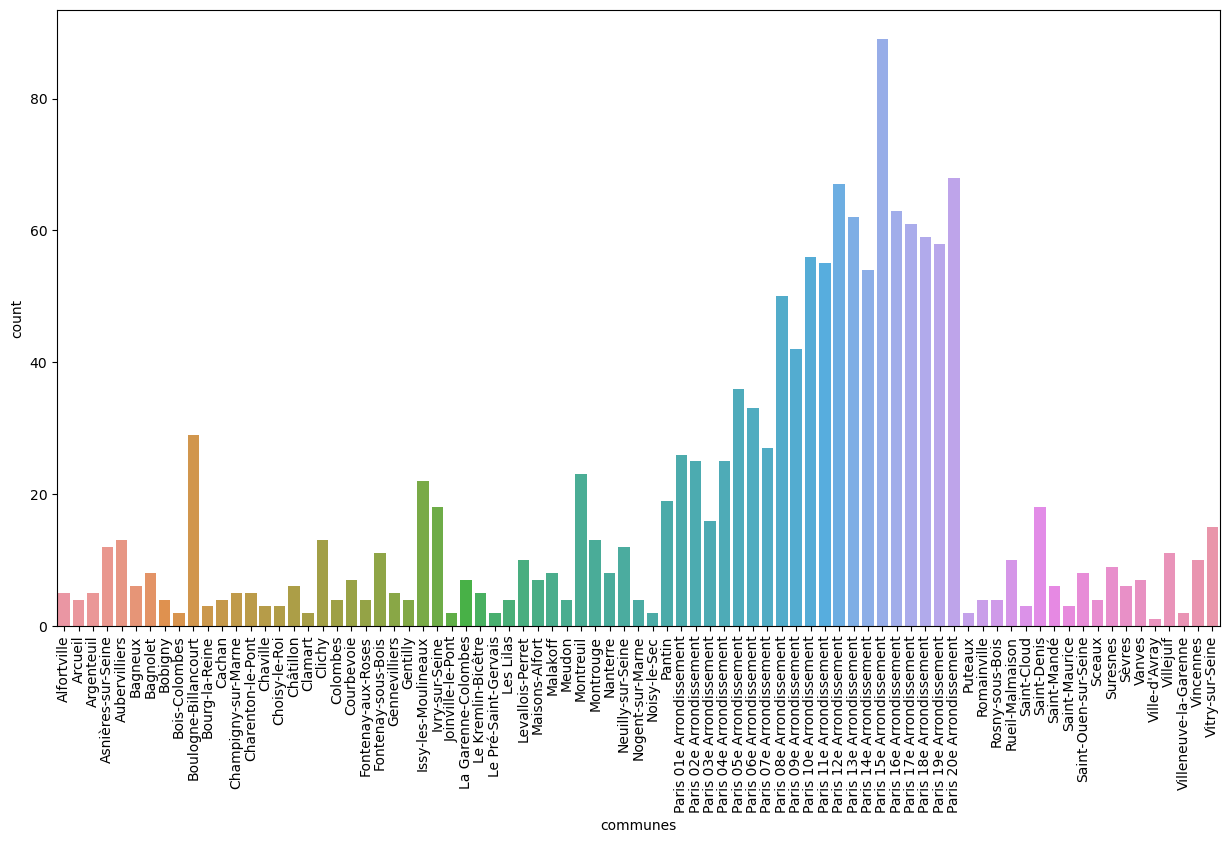

In [25]:
ordered_categories = categorical['communes'].sort_values().unique()
plt.figure(figsize=(15, 8))
sns.countplot(x=categorical['communes'], order=ordered_categories)
plt.xticks(rotation=90) 
plt.show()

In [26]:
data = pd.concat([numerical, categorical], axis=1)
data

,capacity,availability_bike,unavailable_duration,unavailable_count,latitude,longitude,postcode,communes
0,62,11.869707,0.0,0,48.868543,2.360003,75010,Paris 10e Arrondissement
1,17,7.632075,119.0,2,48.870774,2.349650,75010,Paris 10e Arrondissement
2,48,17.184211,0.0,0,48.870893,2.353521,75010,Paris 10e Arrondissement
3,17,7.911932,0.0,0,48.873972,2.348389,75010,Paris 10e Arrondissement
4,28,13.638776,0.0,0,48.872871,2.354215,75010,Paris 10e Arrondissement
...,...,...,...,...,...,...,...,...
1427,20,16.389831,0.0,0,48.901365,2.212693,92000,Nanterre
1428,43,21.022901,0.0,0,48.895029,2.195793,92000,Nanterre
1429,30,5.030612,121.0,1,48.897874,2.218282,92000,Nanterre
1430,22,6.164179,123.0,2,48.895770,2.223908,92000,Nanterre


In [85]:
X = data.drop('unavailable_duration',axis=1)
y = data['unavailable_duration']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [87]:
X_train_cat = X_train.select_dtypes(include='object')
X_train_num = X_train.select_dtypes(include=np.number)
X_test_cat = X_test.select_dtypes(include='object')
X_test_num = X_test.select_dtypes(include=np.number)

In [88]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)


In [89]:
onehot = OneHotEncoder(handle_unknown='ignore', drop='first')
onehot.fit(X_train_cat)

encoded_train = onehot.transform(X_train_cat)
encoded_test = onehot.transform(X_test_cat)

X_train_cat_encoded = pd.DataFrame(encoded_train.toarray())
X_test_cat_encoded = pd.DataFrame(encoded_test.toarray())

In [90]:
X_train = pd.concat((X_train_cat_encoded, X_train_num_scaled),axis=1)
X_test = pd.concat((X_test_cat_encoded, X_test_num_scaled),axis=1)

In [91]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [92]:
models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor(),
          DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

In [93]:
def train_and_test(models, X_train, y_train, X_test, y_test):
    results = {}
    
    for model in models:
        model.fit(X_train, y_train)
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        n_train, p_train = X_train.shape
        adj_train_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        n_test, p_test = X_test.shape
        adj_test_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)
        
        results[type(model).__name__] = {
            'Train R-squared': train_r2,
            'Test R-squared': test_r2,
            
            'Train Adjusted R-squared': adj_train_r2,
            'Test Adjusted R-squared': adj_test_r2,
    
            'Train MAE': train_mae,
            'Test MAE': test_mae,
            
            'Train MSE': train_mse,
            'Test MSE': test_mse,
            
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
        }
    
    return results

models = [LinearRegression(), KNeighborsRegressor(),MLPRegressor(),
    DecisionTreeRegressor(), RandomForestRegressor(),GradientBoostingRegressor()]
results = train_and_test(models, X_train, y_train, X_test, y_test)

for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()


/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


LinearRegression:
Train R-squared: 0.6333
Test R-squared: 0.6517
Train Adjusted R-squared: 0.6070
Test Adjusted R-squared: 0.1263
Train MAE: 53.0898
Test MAE: 45.4228
Train MSE: 16033.4979
Test MSE: 8936.8050
Train RMSE: 126.6234
Test RMSE: 94.5347

KNeighborsRegressor:
Train R-squared: 0.6301
Test R-squared: 0.4347
Train Adjusted R-squared: 0.6036
Test Adjusted R-squared: -0.4182
Train MAE: 47.0253
Test MAE: 50.1014
Train MSE: 16173.3425
Test MSE: 14505.5014
Train RMSE: 127.1745
Test RMSE: 120.4388

MLPRegressor:
Train R-squared: 0.3581
Test R-squared: 0.3789
Train Adjusted R-squared: 0.3121
Test Adjusted R-squared: -0.5581
Train MAE: 89.4556
Test MAE: 84.9725
Train MSE: 28065.4948
Test MSE: 15937.1210
Train RMSE: 167.5276
Test RMSE: 126.2423

DecisionTreeRegressor:
Train R-squared: 1.0000
Test R-squared: 0.2429
Train Adjusted R-squared: 1.0000
Test Adjusted R-squared: -0.8995
Train MAE: 0.0000
Test MAE: 45.4444
Train MSE: 0.0000
Test MSE: 19428.3194
Train RMSE: 0.0000
Test RMSE: 139.

In determining the most suitable model, three key metrics are considered:

- R-squared (R²): Evaluates the explanatory power of the model by measuring the proportion of variance in the dependent variable accounted for by the independent variables.

- Adjusted R-squared (Adjusted R²): Refines R-squared by considering model complexity, penalizing the inclusion of unnecessary predictors, thus offering a more accurate assessment, particularly during model comparisons.

- Mean Absolute Error (MAE): Quantifies prediction accuracy by measuring the average magnitude of errors between predicted and actual values, providing robustness against outliers. In scenarios where predicting unavailable duration is critical, regardless of direction, minimizing MAE is imperative.

Considering R-squared, Adjusted R-squared, and MAE:

1. Linear Regression demonstrates consistent R-squared and Adjusted R-squared values across both training and testing datasets, accompanied by a lower MAE on the test set.

2. Random Forest Regressor exhibits strong performance, characterized by relatively high R-squared and Adjusted R-squared scores on both training and testing sets, coupled with a lower MAE compared to Linear Regression.

3. Gradient Boosting Regressor also showcases robust performance, featuring elevated R-squared and Adjusted R-squared metrics across both training and testing datasets, alongside a moderate MAE on the test set.

In [81]:
models = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor()]

metrics = {
    'LinearRegression': {'MSE': 16198.0911, 'Adjusted R-squared': 0.4289, 'R-squared': 0.5966},
    'RandomForestRegressor': {'MSE': 22449.0647, 'Adjusted R-squared': 0.2085, 'R-squared': 0.4410},
    'GradientBoostingRegressor': {'MSE': 18763.7540, 'Adjusted R-squared': 0.3385, 'R-squared': 0.5328}
}

metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

mean_squared_error_values = metrics_df['MSE'].values
max_mse = max(mean_squared_error_values)
min_mse = min(mean_squared_error_values)
undersampling = max_mse / min_mse > 2

if undersampling:
    print("Undersampling may be present in the dataset.")
else:
    print("Undersampling is not present in the dataset.")


Undersampling is not present in the dataset.


In [53]:
#data[data['capacity']==data['capacity'].max()]

In [54]:
#data[data['availability_bike']==data['availability_bike'].max()]

In [55]:
#dfff = pd.read_csv('velibs_export_2024-02-13_10:44.csv')


In [56]:
#dfff[dfff['identifiant_station']=='12127']

In [57]:
#overcapacity_stations = dfff[dfff['nombre_total_vélos_disponibles']>dfff['capacité_de_la_station']]['nom_station'].unique()
#display(len(overcapacity_stations))
#list(overcapacity_stations)

In [58]:
#normal due to overcapacitated stations 
#source : https://parissecret.com/un-nouveau-type-de-station-velib-vous-permet-de-deposer-votre-velo-meme-sans-place-disponible/
#https://blog.velib-metropole.fr/test-station-plus/
#Lavandieres Sainte Opportune - Rivoli (Station n°1120)
#Abbé Groult - Convention (Station n°15039)


#Aristide Briand – Place de la Résistance (92130 Issy-Les-Moulineaux)
#Malesherbes – Place de la Madeleine (75008 Paris)
#Madeleine Vionnet (93300 Aubervilliers)
#Caumartin – Provence (75009 Paris)
#Bibliothèque Nationale de France (75013 Paris)
#Place du Moulin de Javel (75015 Paris)
#Place Balard (75015 Paris)
#Westermeyer – Paul Vaillant-Couturier (94200 Ivry-sur-Seine)

#Tremblay - Lac des Minimes - Station n°12127
#Saint-Denis - Rivoli - Station n°1003

#Sebastopol – Rambuteau (75004 Paris)
#Saint-Antoine – Sévigné (75004 Paris)
#Place Charles Vallin (75015 Paris)
#Carrefour Pleyel (93200 Saint-Denis)
#Bercy – Villot (75012 Paris)

#Quai des Célestins – Henri IV (75004 Paris)
#Gare Saint-Lazare – Cour du Havre (75008 Paris)
#Place de l’Hôtel de Ville (75004 Paris)
#Daumesnil – Picpus (75012 Paris)
#Clichy – Place Blanche (75018 Paris)
#Cité de la Musique (75019 Paris)
#Enfants du Paradis – Peupliers (92100 Boulogne Billancourt)

#Général de Gaulle • Alouette (94160 Saint Mandé – fonctionnalité prochainement disponible)


In [59]:
#dfff[(dfff['identifiant_station'].isin(['1120', '15039']))&(dfff['nombre_total_vélos_disponibles']>dfff['capacité_de_la_station'])]

In [60]:
#dfff[dfff['identifiant_station'].isin(['1120', '15039'])].groupby(['identifiant_station','capacité_de_la_station'])['nombre_total_vélos_disponibles'].agg(np.mean)

In [61]:
#data[data['availability_bike']>data['capacity']]